In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ai4i2020.csv")
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df = df.drop(['UDI','Product ID'], axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
df_cat = df[['Type']]
df_cat

,Type
0,M
1,L
2,L
3,L
4,L
...,...
9995,M
9996,H
9997,M
9998,H


In [5]:
df_num = df.drop(['Type','Machine failure','TWF','HDF','PWF','OSF','RNF'], axis=1)
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
df_num = scaler.fit_transform(df_num)
df_num

array([[0.30434783, 0.35802469, 0.22293364, 0.53571429, 0.        ],
       [0.31521739, 0.37037037, 0.13969732, 0.58379121, 0.01185771],
       [0.30434783, 0.34567901, 0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.40217391, 0.35802469, 0.27764843, 0.40659341, 0.08695652],
       [0.40217391, 0.37037037, 0.13969732, 0.61401099, 0.09881423],
       [0.40217391, 0.37037037, 0.19324796, 0.5       , 0.11857708]])

In [8]:
df_num = pd.DataFrame(df_num, columns = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]'
                                         ,'Torque [Nm]','Tool wear [min]'])
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.353022,0.055336
9996,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.402174,0.358025,0.277648,0.406593,0.086957
9998,0.402174,0.370370,0.139697,0.614011,0.098814


In [9]:
# Alternate method for converting catagorical data to numerical data
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# cat = encoder.fit_transform(df_cat[['Type']]).toarray()

In [10]:
cat = pd.get_dummies(df_cat[['Type']], dtype=float)
df_cat = pd.DataFrame(cat)

df_cat

,Type_H,Type_L,Type_M
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,1.0,0.0,0.0
9997,0.0,0.0,1.0
9998,1.0,0.0,0.0


In [11]:
X = pd.concat([df_cat,df_num],axis=1)
X

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.0,0.0,1.0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,1.0,0.0,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.0,1.0,0.0,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.380435,0.333333,0.253783,0.353022,0.055336
9996,1.0,0.0,0.0,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.0,0.0,1.0,0.402174,0.358025,0.277648,0.406593,0.086957
9998,1.0,0.0,0.0,0.402174,0.370370,0.139697,0.614011,0.098814


In [12]:
y = df[['Machine failure']]
y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000, 1)
(2000, 1)


In [15]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score,precision_score, roc_auc_score, recall_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

target_names=["Machine Failure"]


In [16]:
#CONFUSION_MATRIX_STORAGE
CMS = {}
results = {}
#FIT
rf_model01 = RandomForestClassifier(n_estimators=50)
rf_model01.fit(X_train, y_train.values.ravel()) #rf_model01.fit(X_train, y_train.values.ravel()) to eliminate the warning (still warning)-please check it once

#Predict
rf_model01_prediction = rf_model01.predict(X_test)
CMS["rf_model01"] = confusion_matrix(y_test, rf_model01_prediction)

#STATS
rf_model01_acc = accuracy_score(y_test, rf_model01_prediction)
rf_model01_rec = recall_score(y_test, rf_model01_prediction)
rf_model01_pre = precision_score(y_test,rf_model01_prediction)
rf_model01_f1s = f1_score(y_test, rf_model01_prediction)
rf_model01_test_probs = rf_model01.predict_proba(X_test)[:, 1]
rf_model01_roc_auc = roc_auc_score(y_test, rf_model01_test_probs)


#VALIDATION
rf_model02_cv_recall = cross_val_score(rf_model01, X, y, cv=5, scoring="recall")



C:\Users\bikes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bikes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bikes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bikes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConvers

In [17]:
#RESULTS
results['rf_model01'] = {
    "acc":rf_model01_acc,
    "rec":rf_model01_rec,
    "pre":rf_model01_pre,
    "f1s":rf_model01_f1s,
    "roc_auc":rf_model01_roc_auc,
    "cv_recall":np.mean(rf_model02_cv_recall)
}
results

{'rf_model01': {'acc': 0.98,
  'rec': 0.4657534246575342,
  'pre': 0.9714285714285714,
  'f1s': 0.6296296296296297,
  'roc_auc': 0.952545300737181,
  'cv_recall': 0.3892888498683056}}

In [18]:
#GRID_SEARCH
from sklearn.model_selection import GridSearchCV


In [19]:
#PARAM_GRID_01
param_grid_01 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

#RF_MODEL02 - #PARAM_GRID_01
rf_model02 = GridSearchCV(RandomForestClassifier(),param_grid_01,refit=True)
rf_model02.fit(X_train,y_train.values.ravel()) #rf_model02.fit(X_train, y_train.values.ravel()) to eliminate the warning
rf_model02_prediction = rf_model02.predict(X_test)
CMS["rf_model02"] = confusion_matrix(y_test, rf_model02_prediction)

#RF_MODEL02_STATS
rf_model02_acc = accuracy_score(y_test, rf_model02_prediction)
rf_model02_rec = recall_score(y_test, rf_model02_prediction)
rf_model02_pre = precision_score(y_test,rf_model02_prediction)
rf_model02_f1s = f1_score(y_test, rf_model02_prediction)
rf_model02_test_probs = rf_model02.predict_proba(X_test)[:, 1]
rf_model02_roc_auc = roc_auc_score(y_test, rf_model02_test_probs)


#VALIDATION
rf_model02_cv_recall = cross_val_score(rf_model02, X, y, cv=5, scoring="recall")



C:\Users\bikes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bikes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bikes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bikes\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConvers

KeyboardInterrupt: 

In [43]:

#ADD TO RESULTS
results['rf_model02'] = {
    "acc":rf_model02_acc,
    "rec":rf_model02_rec,
    "pre":rf_model02_pre,
    "f1s":rf_model02_f1s,
    "roc_auc":rf_model02_roc_auc,
    "cv_recall":np.mean(rf_model02_cv_recall)
}



In [53]:
#RF_MODEL02 - #PARAM_GRID01_BEST
model_name = ""
print("rf_model02 gridsearch cv ")
print(f"BEST ESTIMATOR: \n",rf_model02.best_estimator_)
print(f"BEST PARAMS: \n",rf_model02.best_params_)
print(f"BEST SCORE: \n",rf_model02.best_score_)
print(f"BEST INDEX: \n",rf_model02.best_index_)

rf_model02 gridsearch cv 
BEST ESTIMATOR: 
 RandomForestClassifier(n_estimators=500)
BEST PARAMS: 
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
BEST SCORE: 
 0.9817500000000001
BEST INDEX: 
 2


In [45]:
#PARAM_GRID_02
param_grid_02 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_leaf':[1,2,4],    
}

#RF_MODEL03 - #PARAM_GRID_02
rf_model03 = GridSearchCV(RandomForestClassifier(),param_grid_01,refit=True, scoring='recall')
rf_model03.fit(X_train,y_train.values.ravel())
rf_model03_prediction = rf_model03.predict(X_test)
CMS["rf_model03"] = confusion_matrix(y_test, rf_model03_prediction)

#RF_MODEL03_STATS
rf_model03_acc = accuracy_score(y_test, rf_model03_prediction)
rf_model03_rec = recall_score(y_test, rf_model03_prediction)
rf_model03_pre = precision_score(y_test,rf_model03_prediction)
rf_model03_f1s = f1_score(y_test, rf_model03_prediction)
rf_model03_test_probs = rf_model03.predict_proba(X_test)[:, 1]
rf_model03_roc_auc = roc_auc_score(y_test, rf_model03_test_probs)


#VALIDATION
rf_model03_cv_recall = cross_val_score(rf_model03, X, y, cv=5, scoring="recall")




C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [46]:
#ADD TO RESULTS
results['rf_model03'] = {
    "acc":rf_model03_acc,
    "rec":rf_model03_rec,
    "pre":rf_model03_pre,
    "f1s":rf_model03_f1s,
    "roc_auc":rf_model03_roc_auc,
    "cv_recall":np.mean(rf_model03_cv_recall)
}

In [47]:
#RF_MODEL03 - #PARAM_GRID02_BEST
print("rf_model03 gridsearch cv ")
print(f"BEST ESTIMATOR: \n",rf_model03.best_estimator_)
print(f"BEST PARAMS: \n",rf_model03.best_params_)
print(f"BEST SCORE: \n",rf_model03.best_score_)
print(f"BEST INDEX: \n",rf_model03.best_index_)

rf_model03 gridsearch cv 
BEST ESTIMATOR: 
 RandomForestClassifier(n_estimators=200)
BEST PARAMS: 
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
BEST SCORE: 
 0.5112508735150245
BEST INDEX: 
 1


In [54]:
#FEATURE_REMOVAL
X_drop = X.drop('Process temperature [K]', axis=1)
X_drop

X_train, X_test, y_train, y_test = train_test_split(X_drop,y,test_size=0.2,random_state=101)

#FIT
rf_model04 = RandomForestClassifier(n_estimators=50)
rf_model04.fit(X_train, y_train.values.ravel())
#PREDICTION
rf_model04_prediction = rf_model04.predict(X_test)
CMS["rf_model04"] = confusion_matrix(y_test, rf_model04_prediction)

#VALIDATION
rf_model04_cv_recall = cross_val_score(rf_model04, X, y, cv=5, scoring="recall")

C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [55]:
#FEATURE_REMOVAL_STATS
rf_model04_acc = accuracy_score(y_test, rf_model04_prediction)
rf_model04_rec = recall_score(y_test, rf_model04_prediction)
rf_model04_pre = precision_score(y_test,rf_model04_prediction)
rf_model04_f1s = f1_score(y_test, rf_model04_prediction)
rf_model04_test_probs = rf_model04.predict_proba(X_test)[:, 1]
rf_model04_roc_auc = roc_auc_score(y_test, rf_model04_test_probs)


In [56]:
#FEATURE_REMOVAL_RESULTS_DICT
results['rf_model04'] = {
    "acc":rf_model04_acc,
    "rec":rf_model04_rec,
    "pre":rf_model04_pre,
    "f1s":rf_model04_f1s,
    "roc_auc":rf_model04_roc_auc,
    "cv_recall":np.mean(rf_model04_cv_recall)
}
results


{'rf_model01': {'acc': 0.9805,
  'rec': 0.4931506849315068,
  'pre': 0.9473684210526315,
  'f1s': 0.6486486486486486,
  'roc_auc': 0.9276503330466124,
  'cv_recall': 0.34521510096575947},
 'rf_model02': {'acc': 0.9805,
  'rec': 0.4794520547945205,
  'pre': 0.9722222222222222,
  'f1s': 0.6422018348623852,
  'roc_auc': 0.9498972780459369,
  'cv_recall': 0.34521510096575947},
 'rf_model03': {'acc': 0.982,
  'rec': 0.5205479452054794,
  'pre': 0.9743589743589743,
  'f1s': 0.6785714285714285,
  'roc_auc': 0.9479814602867684,
  'cv_recall': 0.41892010535557506},
 'rf_model04': {'acc': 0.9735,
  'rec': 0.3835616438356164,
  'pre': 0.7777777777777778,
  'f1s': 0.5137614678899082,
  'roc_auc': 0.9308066339188602,
  'cv_recall': 0.401316944688323}}

In [ ]:
#UnderSampling

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)

# Divide the samples by the prediction class
target1 = train_df[train_df['Machine failure'] == 0]
target2 = train_df[train_df['Machine failure'] == 1]

'''target1 = train_df[train_df.iloc[:,-1] == 0]
target2 = train_df[train_df.iloc[:,-1] == 1]'''

# Count the number of samples in each class
target1_count, target2_count = train_df.iloc[:,-1].value_counts()
print(f"Class 1 count: {target1_count}, Class 2 count: {target2_count}")

# Reduce the samples of class 1 using the number of samples in class 2
target1_u = target1.sample(target2_count, random_state=42)
train_df_u = pd.concat([target1_u, target2], axis=0)

# Divide the features and target for undersampled data
X_train_u = train_df_u.drop(['Machine failure'], axis=1)
y_train_u = train_df_u[['Machine failure']]
print(type(y_train_u))

In [ ]:
# Create a Random Forest classifier
dt_model05 =RandomForestClassifier(n_estimators=50)

# Train the classifier on the undersampled training data
dt_model05.fit(X_train_u, y_train_u.values.ravel())

# Make predictions on the test set
dt_model05_prediction = dt_model05.predict(X_test)
CMS["dt_model05"] = confusion_matrix(y_test, dt_model05_prediction)

#VALIDATION
dt_model05_cv_recall = cross_val_score(dt_model05, X, y, cv=5, scoring="recall")

In [ ]:
# Model05 Evaluation Metrics
dt_model05_acc = accuracy_score(y_test, dt_model05_prediction)
dt_model05_rec = recall_score(y_test, dt_model05_prediction)
dt_model05_pre = precision_score(y_test,dt_model05_prediction)
dt_model05_f1s = f1_score(y_test, dt_model05_prediction)
dt_model05_test_probs = dt_model05.predict_proba(X_test)[:, 1]
dt_model05_roc_auc = roc_auc_score(y_test, dt_model05_test_probs)

In [ ]:
#Print the Evaluation Metrics for the Undersampled Model05
results['dt_model05'] = {
        "acc":dt_model05_acc,
        "rec":dt_model05_rec,
        "pre":dt_model05_pre,
        "f1s":dt_model05_f1s,
        "roc_auc":dt_model05_roc_auc,
        "cv_recall":np.mean(dt_model05_cv_recall)
    }
results

In [57]:

#PRINT RESULTS
for model,metrics in results.items():
    print(f"Model:{model}")
    for metric,value in metrics.items():
        print(f"{metric}: {value}")
    print("-------------")

Model:rf_model01
acc: 0.9805
rec: 0.4931506849315068
pre: 0.9473684210526315
f1s: 0.6486486486486486
roc_auc: 0.9276503330466124
cv_recall: 0.34521510096575947
-------------
Model:rf_model02
acc: 0.9805
rec: 0.4794520547945205
pre: 0.9722222222222222
f1s: 0.6422018348623852
roc_auc: 0.9498972780459369
cv_recall: 0.34521510096575947
-------------
Model:rf_model03
acc: 0.982
rec: 0.5205479452054794
pre: 0.9743589743589743
f1s: 0.6785714285714285
roc_auc: 0.9479814602867684
cv_recall: 0.41892010535557506
-------------
Model:rf_model04
acc: 0.9735
rec: 0.3835616438356164
pre: 0.7777777777777778
f1s: 0.5137614678899082
roc_auc: 0.9308066339188602
cv_recall: 0.401316944688323
-------------


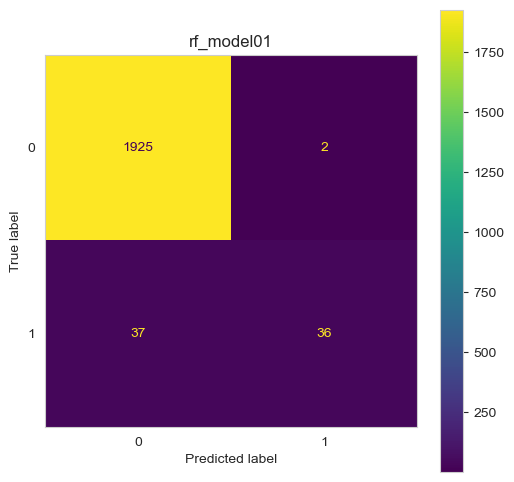

In [49]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model01'], display_labels=rf_model01.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model01')
plt.grid(None)
disp.plot(ax=ax)

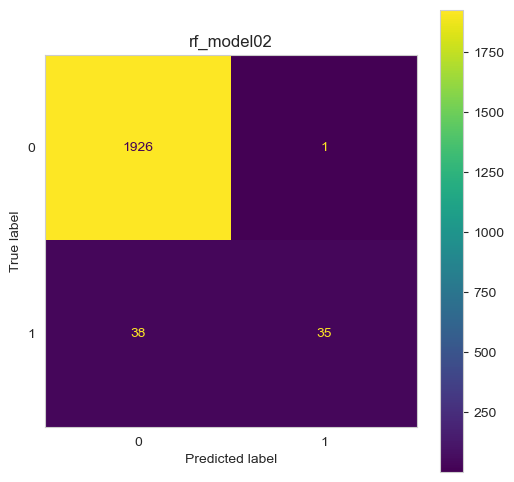

In [50]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model02'], display_labels=rf_model02.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model02')
plt.grid(None)
disp.plot(ax=ax)

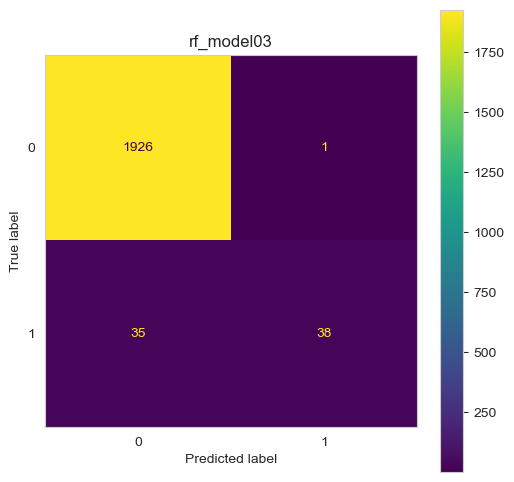

In [51]:

disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model03'], display_labels=rf_model03.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model03')
plt.grid(None)
disp.plot(ax=ax)

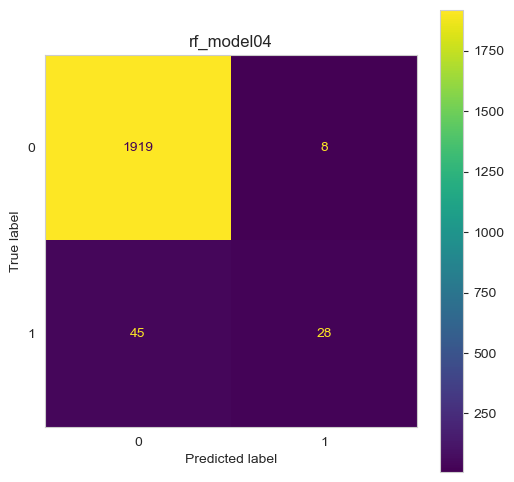

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['rf_model04'], display_labels=rf_model04.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('rf_model04')
plt.grid(None)
disp.plot(ax=ax)

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=CMS['dt_model05'], display_labels=dt_model05.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('dt_model05')
plt.grid(None)
disp.plot(ax=ax)

KeyError: 'dt_model05'